In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train = pd.read_csv("C:/Users/Admin/Downloads/train.csv")
test  = pd.read_csv("C:/Users/Admin/Downloads/test.csv")

In [3]:
train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [4]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [6]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [7]:
train.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

In [9]:
train.brand.unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [10]:
print(train.groupby("brand")["model"].value_counts())

brand  model                        
Acura  MDX 3.7L Advance                 190
       TLX V6 Advance                   139
       TLX Type S w/Performance Tire    119
       MDX w/Technology Package         108
       ILX Technology Plus Package       91
                                       ... 
Volvo  Taycan Base                        1
       X2 xDrive28i                       1
       i8 Base                            1
smart  ForTwo Pure                        2
       Nautilus Reserve                   1
Name: count, Length: 3555, dtype: int64


In [11]:
train.engine.unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

In [12]:
def fill_mode(series):
    mode = series.mode()
    if not mode.empty:
        return series.fillna(mode[0])
    else:
        return series 

In [13]:
train["clean_title"] = train.groupby(["brand","model"])["clean_title"].transform(fill_mode)
test["clean_title"] = test.groupby(["brand","model"])["clean_title"].transform(fill_mode)

In [14]:
train.isnull().sum()

id                 0
brand              0
model              0
model_year         0
milage             0
fuel_type       5083
engine             0
transmission       0
ext_col            0
int_col            0
accident        2452
clean_title      270
price              0
dtype: int64

In [15]:
train["accident"] = train.groupby(["brand","model"])["accident"].transform(fill_mode)
test["accident"] = train.groupby(["brand","model"])["accident"].transform(fill_mode)

In [16]:
train["accident"].isnull().sum()

41

In [17]:
train["fuel_type"] = train.groupby(["brand","model","engine"])["fuel_type"].transform(fill_mode)
test["fuel_type"] = test.groupby(["brand","model","engine"])["fuel_type"].transform(fill_mode)
train["fuel_type"].isnull().sum()

807

In [18]:
train.isnull().sum()

id                0
brand             0
model             0
model_year        0
milage            0
fuel_type       807
engine            0
transmission      0
ext_col           0
int_col           0
accident         41
clean_title     270
price             0
dtype: int64

In [19]:
train["clean_title"] = train["clean_title"].fillna(train["clean_title"].mode()[0])
train["accident"] = train["accident"].fillna(train["accident"].mode()[0])
train["fuel_type"] = train["fuel_type"].fillna(train["fuel_type"].mode()[0])

In [20]:
test["clean_title"] = test["clean_title"].fillna(test["clean_title"].mode()[0])
test["accident"] = test["accident"].fillna(test["accident"].mode()[0])
test["fuel_type"] = test["fuel_type"].fillna(test["fuel_type"].mode()[0])

In [21]:
train.isnull().sum()
test.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

EDA

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


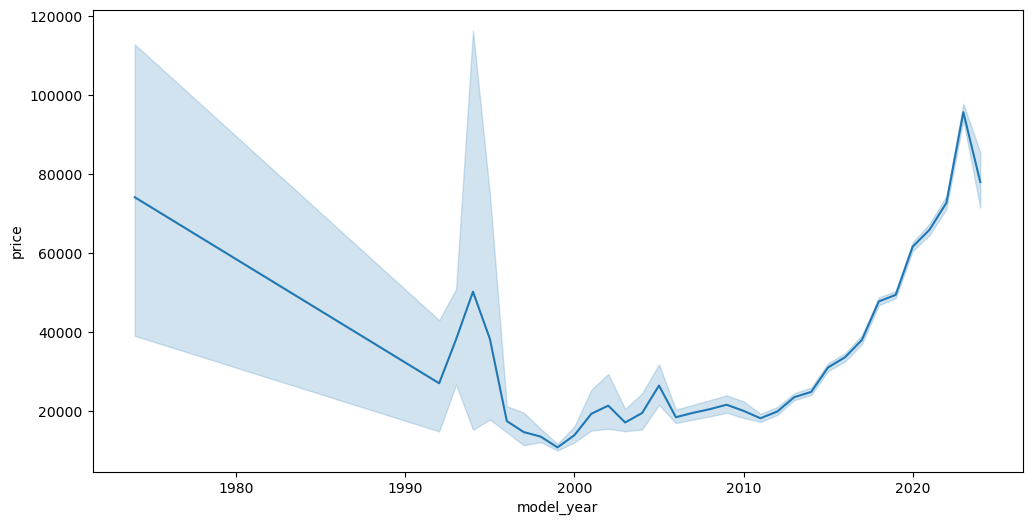

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(data = train,x="model_year",y="price")
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


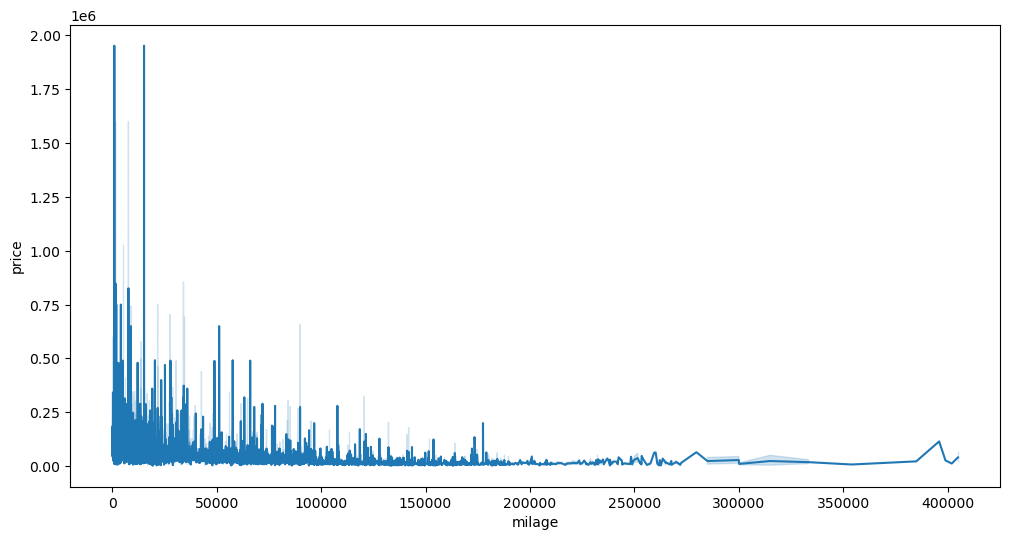

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(data = train,x="milage",y="price")
plt.show()

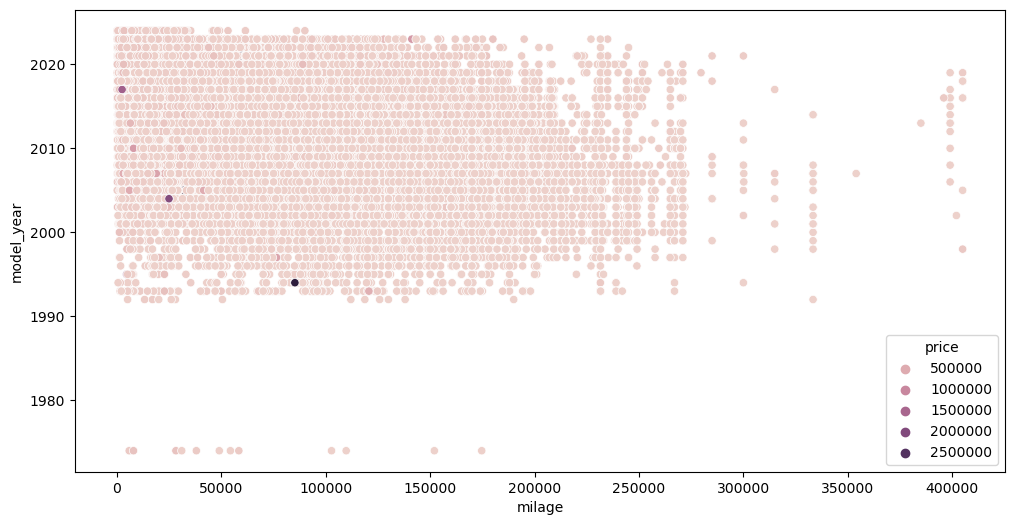

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = train,x="milage",y="model_year",hue="price")
plt.show()

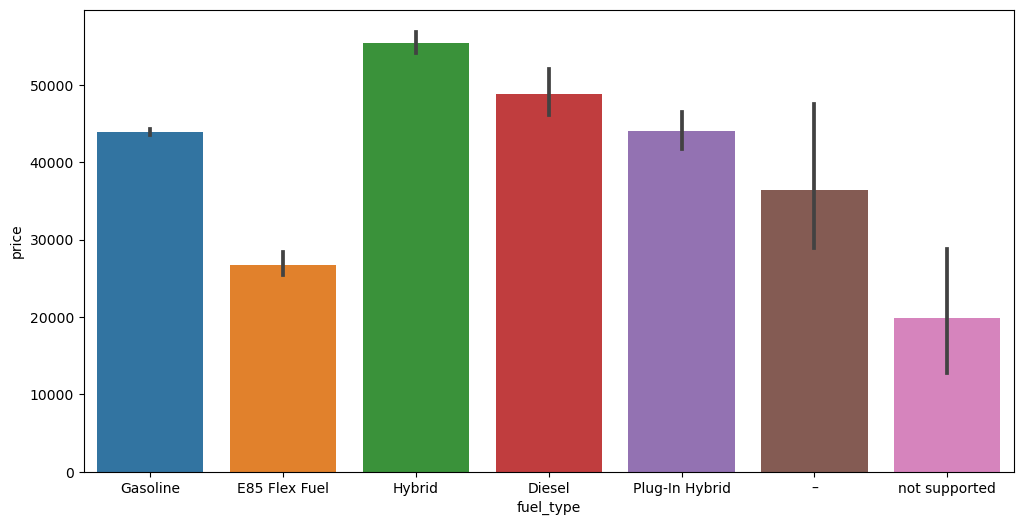

In [25]:
plt.figure(figsize = (12,6))
sns.barplot(data = train , x = "fuel_type",y = "price")
plt.show()

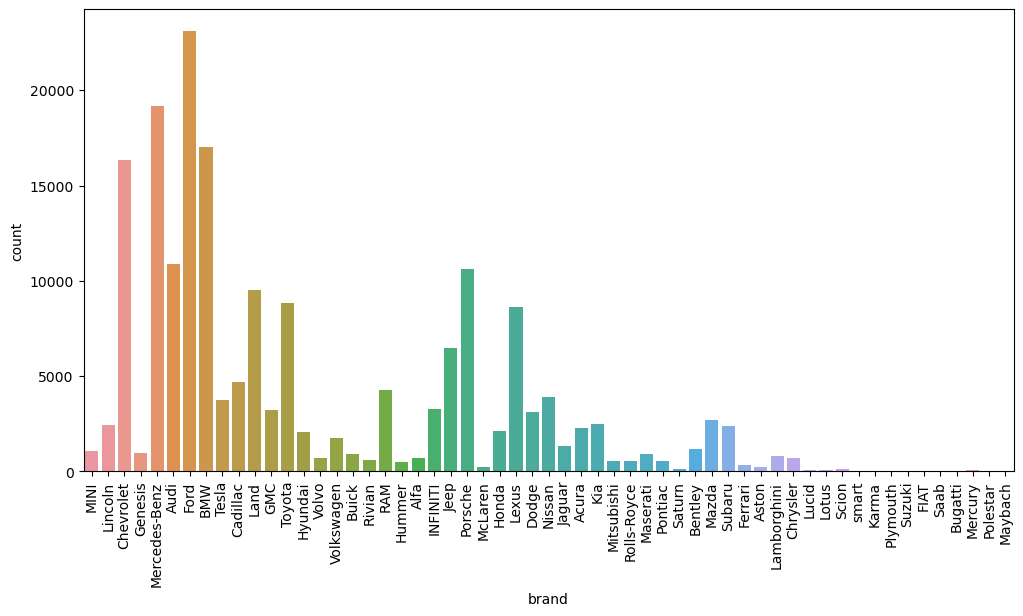

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data = train , x = "brand")
plt.xticks(rotation = 90)
plt.show()

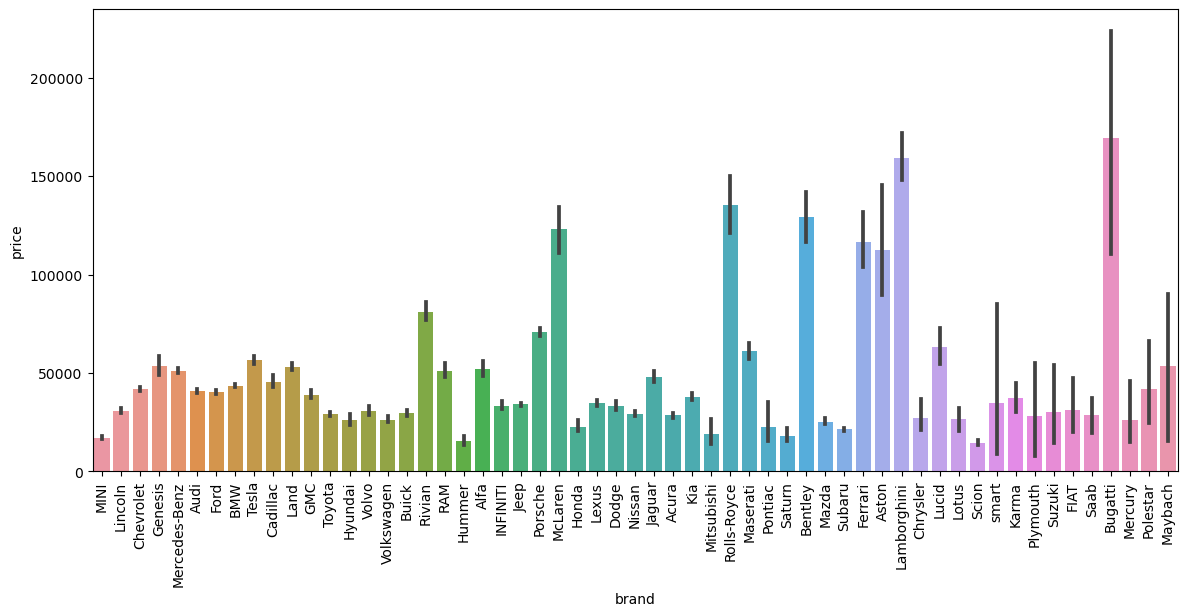

In [27]:
plt.figure(figsize=(14,6))
sns.barplot(data=train,x="brand",y="price")
plt.xticks(rotation=90) 
plt.show()

FEATURE ENGINEERING AND SELECTION

In [28]:
train["accident"] = train["accident"].replace("None supported","No")
train["accident"] = train["accident"].replace("At least 1 accident or damage reported","Yes")

test["accident"] = test["accident"].replace("None supported","No")
test["accident"] = test["accident"].replace("At leat 1 accident or damage reported","Yes")

In [29]:
train["fuel_type"] = train["fuel_type"].replace("-","Unknown")
test["fuel_type"] = test["fuel_type"].replace("-","Unknown")

In [30]:
features = ["brand","model","model_year","milage","fuel_type","engine","transmission","accident","ext_col","int_col","clean_title"]

In [31]:
X_to_train = train[features]

In [32]:
label_encoder = LabelEncoder()
for i in X_to_train.columns:
    if X_to_train[i].dtype == "object":
        X_to_train.loc[:,i] = label_encoder.fit_transform(X_to_train[i])

In [33]:
X_to_train.nunique()

brand             57
model           1897
model_year        34
milage          6651
fuel_type          7
engine          1117
transmission      52
accident           2
ext_col          319
int_col          156
clean_title        1
dtype: int64

In [34]:
X_to_train.describe()

,model_year,milage
count,188533.000000,188533.000000
mean,2015.829998,65705.295174
std,5.660967,49798.158076
min,1974.000000,100.000000
25%,2013.000000,24115.000000
50%,2017.000000,57785.000000
75%,2020.000000,95400.000000
max,2024.000000,405000.000000


In [35]:
y = train["price"]

In [36]:
X_to_test = test[features]

In [37]:
label_encoder = LabelEncoder()
for i in X_to_test.columns:
    if X_to_test[i].dtype == "object":
        X_to_test.loc[:,i] = label_encoder.fit_transform(X_to_test[i])

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_to_train,y, test_size = 0.2, random_state = 42)

In [39]:
# model = LinearRegression()
# param_grid_lr = {
#      'fit_intercept': [True, False],       
#      'copy_X': [True, False],
#      'positive': [True, False] 
#  }
# grid_search_lr = GridSearchCV(estimator=model, param_grid=param_grid_lr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [40]:
 # grid_search_lr.fit(X_train, y_train)
 # y_pred = grid_search_lr.predict(X_test)

In [41]:
 # rmse = mean_squared_error(y_test, y_pred,squared=False)
 # print(rmse)

In [42]:
# test_predictions = grid_search_lr.predict(X_to_test)

In [43]:
model = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [10, 20, 50],       
    'max_depth': [10, 20, 30],             
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],         
    'bootstrap': [True, False]             
}

random_search_rf=RandomizedSearchCV(estimator=model, param_distributions=param_grid_rf, 
                                    n_iter=50, cv=3, scoring='neg_mean_squared_error',
                                    n_jobs=-1, random_state=42)


In [46]:
random_search_rf.fit(X_train, y_train)
y_pred = random_search_rf.predict(X_test)

In [47]:
rmse = mean_squared_error(y_test, y_pred,squared=False)
print(rmse)

68839.27755604147


In [48]:
test_predictions = random_search_rf.predict(X_to_test)

In [51]:
# categorical_cols = ["brand","model","fuel_type","engine","transmission","accident","ext_col","int_col","clean_title"]

# for col in categorical_cols:
#     X_train[col] = X_train[col].astype('category')
#     X_test[col] = X_test[col].astype('category')
#     X_to_test[col] = X_to_test[col].astype('category')
    
# xgb_model = XGBRegressor(random_state=42,enable_categorical=True)
# param_distributions_xgb = {
#     'n_estimators': [15, 30, 45],
#     'max_depth': [6, 8, 10],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.3],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [1, 1.5, 2]
# }

# random_search_xgb = RandomizedSearchCV(estimator=xgb_model, 
#                                        param_distributions=param_distributions_xgb, 
#                                        n_iter=20, cv=5, scoring='neg_mean_squared_error', 
#                                        n_jobs=-1, random_state=42, verbose=2)

# random_search_xgb.fit(X_train, y_train)
# y_pred= random_search_xgb.predict(X_test)

# rmse = mean_squared_error(y_test, y_pred,squared=False)
# print(rmse)

# test_predictions = random_search_xgb.predict(X_to_test)

In [53]:
y_actual=pd.read_csv("C:/Users/Admin/Downloads/sample_submission.csv")

In [54]:
rmse = mean_squared_error(test_predictions, y_actual["price"],squared=False)
print(rmse)

31374.668418436315


In [57]:
submission = pd.DataFrame({'id': test['id'], 'price': test_predictions})
submission.to_csv('output_file.csv', index=False)